# Algunos graficos

In [1]:
import QuantLib as ql

In [2]:
precio_activo = 440 #Spot (S)
precio_ejercicio = 450 #Strike (K)
volatilidad = 0.3394  #Volatilidad Implicita anualizada (sigma)
tasa_interes = 0.0013 #tasa libre de riesgo anualizada (r)
tasa_dividendos =  0.075 #tasa de dividendos anualizada (q)


In [3]:
#Expiracion el 16 de octubre de 2020
fecha_expiracion = ql.Date(16, 10, 2020)

#Valuacion el 16 de octubre de 2020
fecha_valuacion = ql.Date(6, 8, 2020)
ql.Settings.instance().evaluationDate = fecha_valuacion

#Calendario y convencion de daycount
day_count = ql.Actual365Fixed()
calendario = ql.UnitedStates()


In [4]:
tipo_opcion = ql.Option.Call #Tipo de opcion (CALL o PUT)
payoff = ql.PlainVanillaPayoff(tipo_opcion, precio_ejercicio)
ejercicio_europeo = ql.EuropeanExercise(fecha_expiracion)
opcion_europea = ql.VanillaOption(payoff, ejercicio_europeo)

In [5]:
S = ql.SimpleQuote(precio_activo)
objeto_spot = ql.QuoteHandle(S)

r = ql.SimpleQuote(tasa_interes)
objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                            ql.QuoteHandle(r), 
                                                        day_count))
q = ql.SimpleQuote(tasa_dividendos)
objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                      ql.QuoteHandle(q), 
                                                      day_count))

sigma = ql.SimpleQuote(volatilidad)
objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                 calendario, 
                                                                 ql.QuoteHandle(sigma), 
                                                             day_count))

proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                           objeto_tasa_dividendos, 
                                           objeto_tasa_interes, 
                                           objeto_volatilidad)

In [6]:
modelo_BS = ql.AnalyticEuropeanEngine(proceso_BSM)

opcion_europea.setPricingEngine(modelo_BS)

In [7]:
#Seteo de Matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


Sensibilidad del precio con respecto al spot

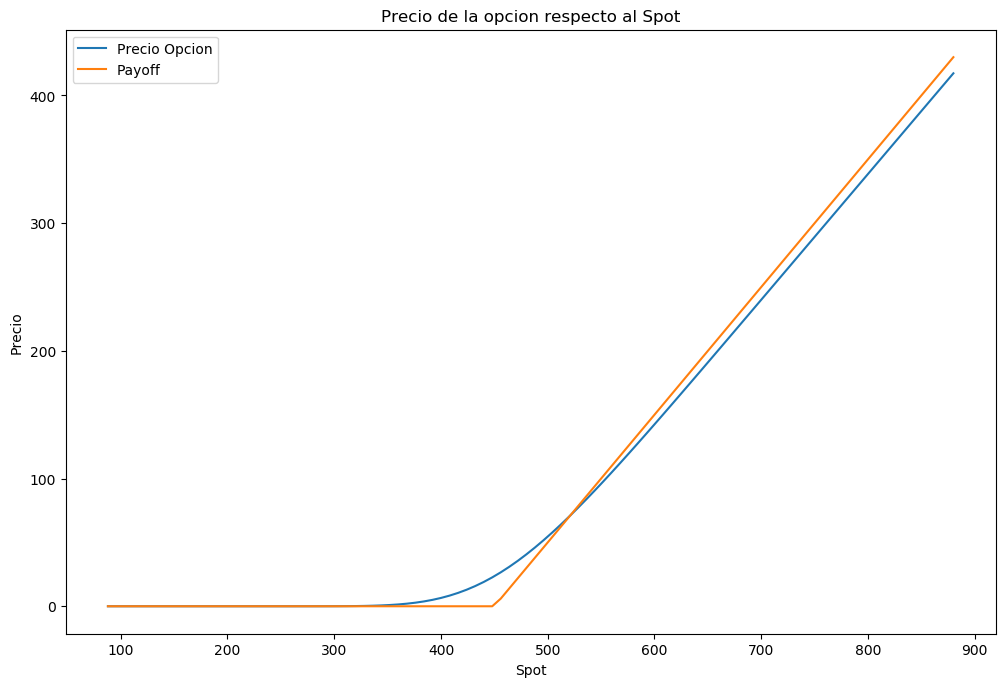

In [8]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.NPV())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Precio Opcion')
plt.plot(S_vec, payoff_vec, label = 'Payoff')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio')
plt.title('Precio de la opcion respecto al Spot')
    
plt.show()

#Vuelvo
S.setValue(precio_activo)

Delta con respecto al spot

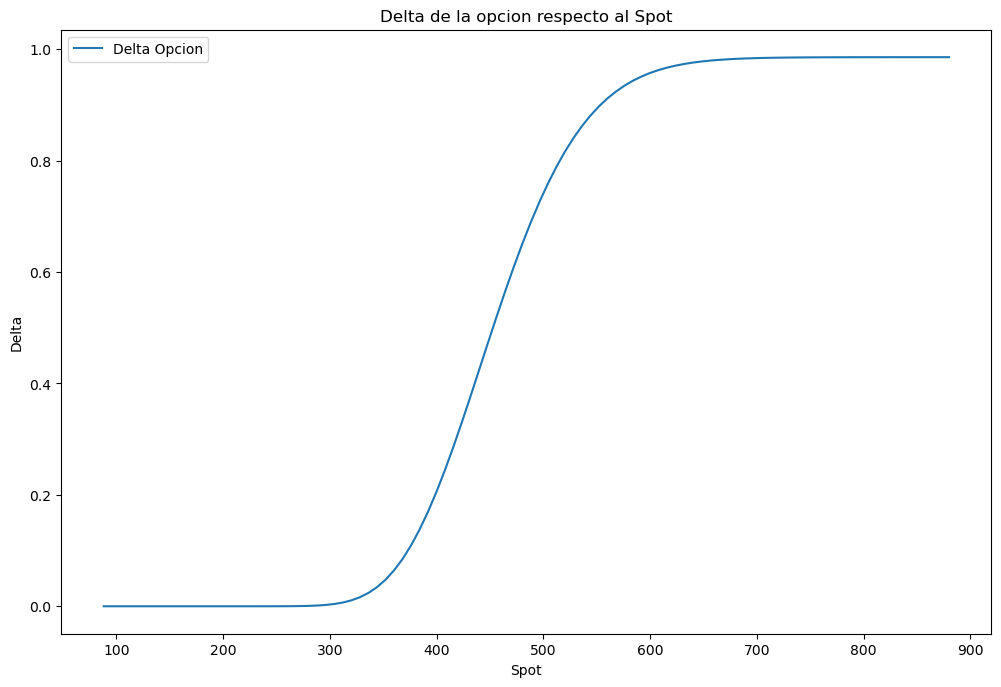

In [8]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.delta())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Delta Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Delta')
plt.title('Delta de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

Gamma con respecto al spot

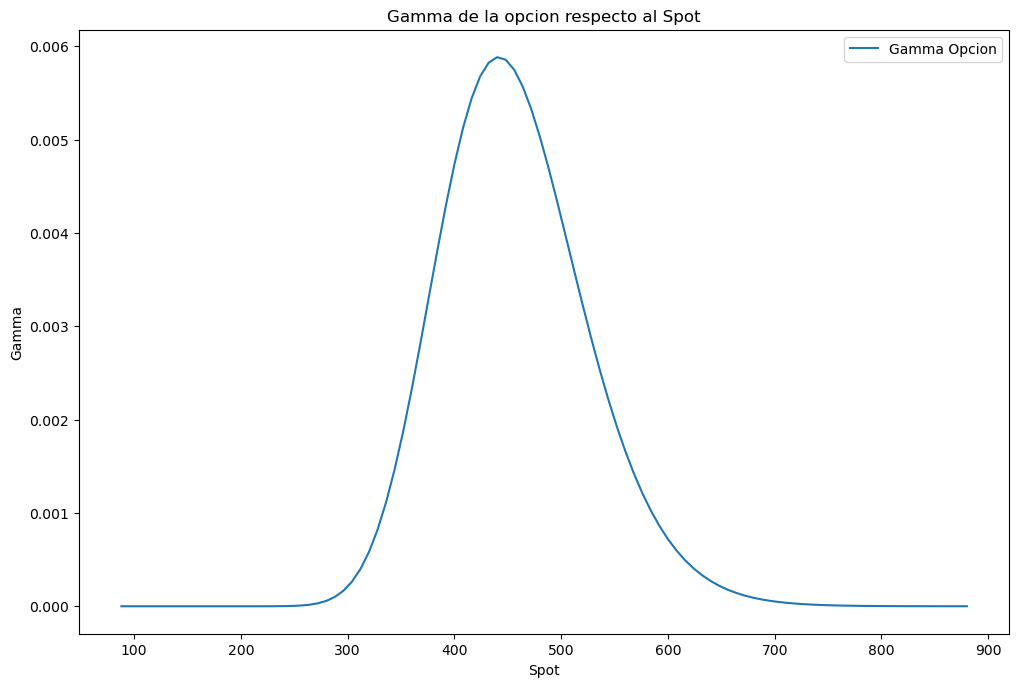

In [9]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.gamma())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Gamma Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.title('Gamma de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

Vega con respecto al spot

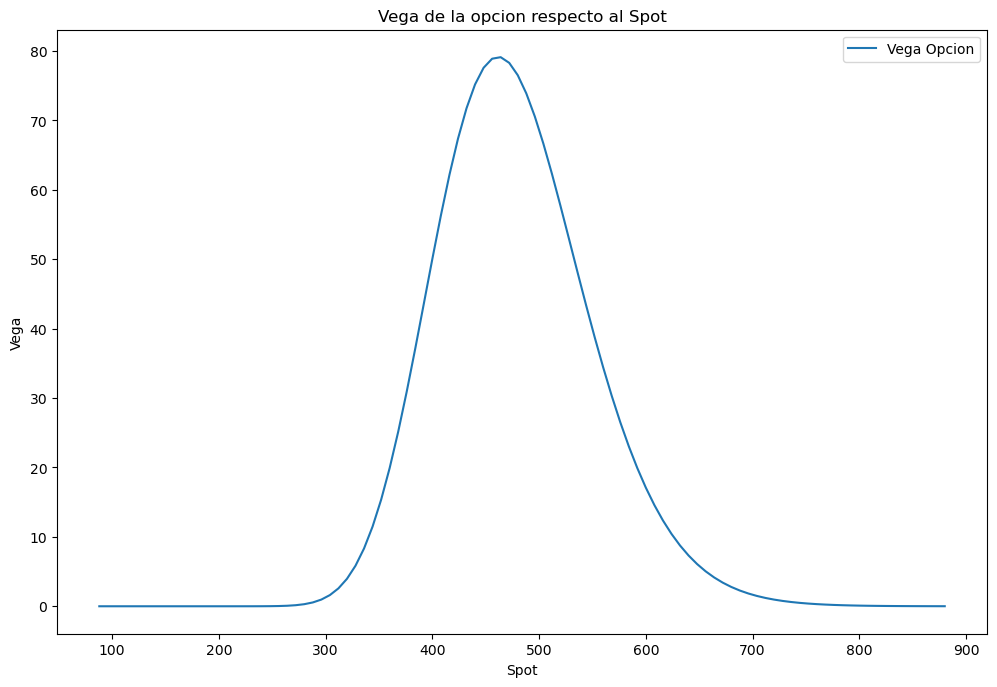

In [10]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.vega())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Vega Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Vega')
plt.title('Vega de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

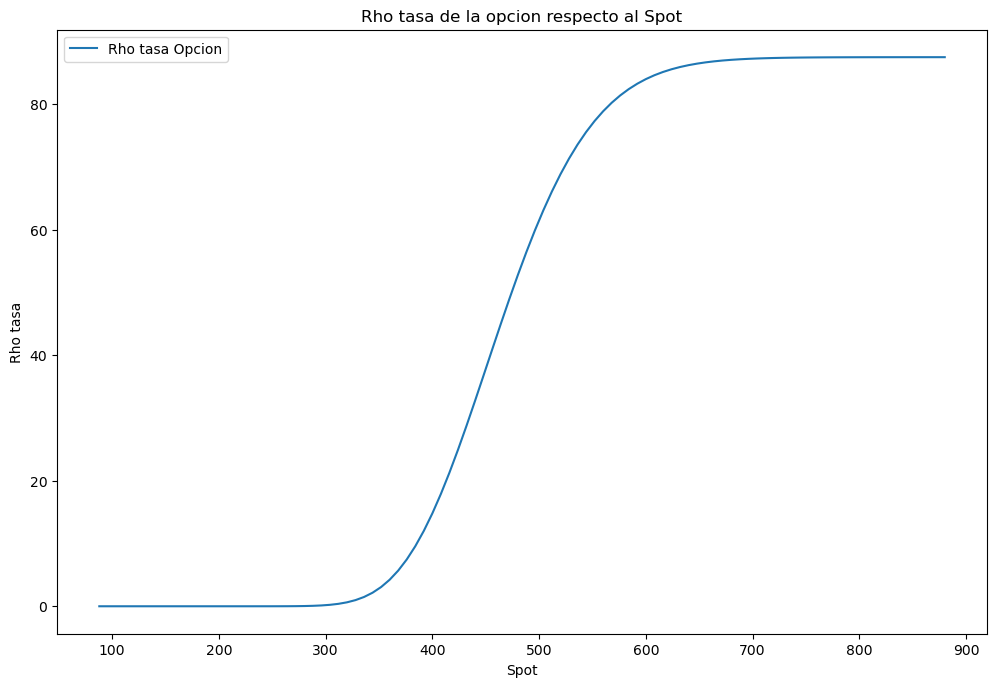

In [11]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.rho())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Rho tasa Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Rho tasa')
plt.title('Rho tasa de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

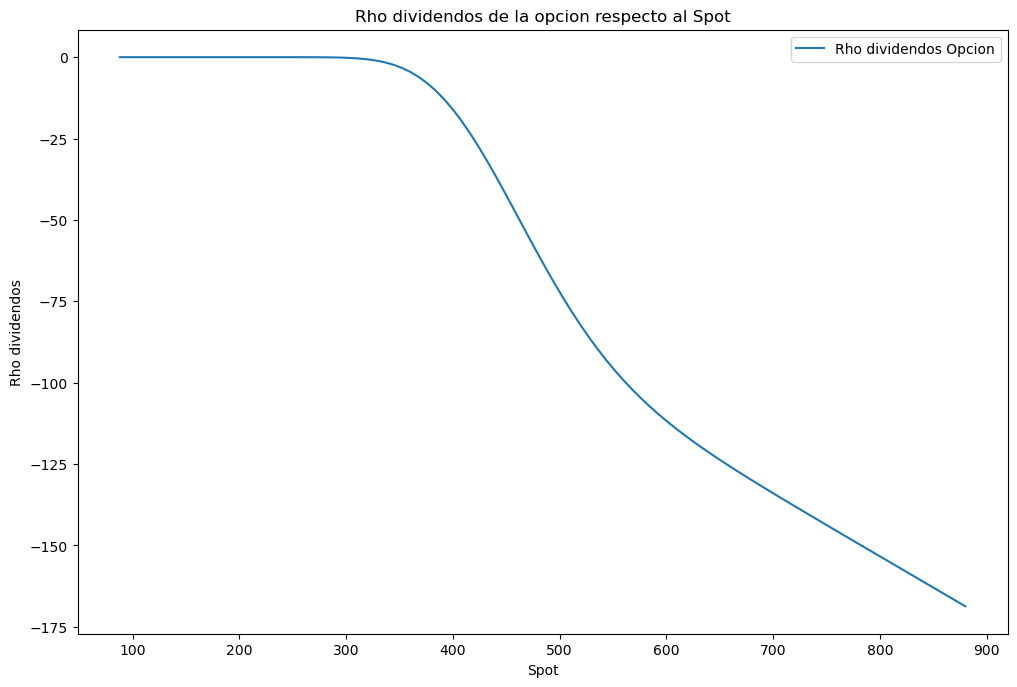

In [12]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.dividendRho())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Rho dividendos Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Rho dividendos')
plt.title('Rho dividendos de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

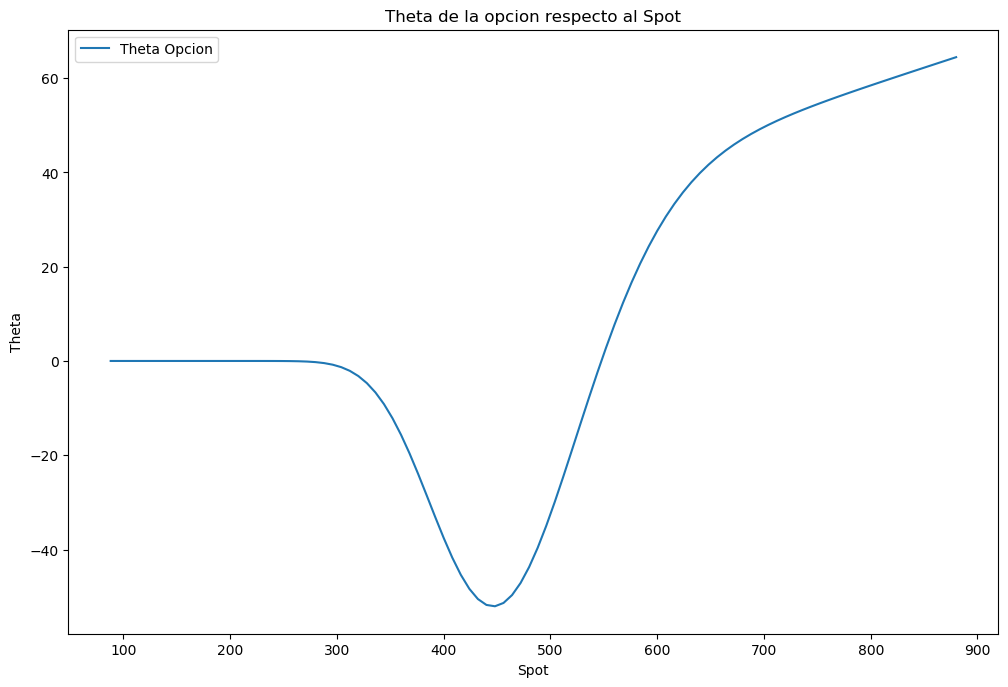

In [14]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_vec=[]
payoff_vec=[]
for S_i in S_vec:
    S.setValue(S_i)
    NPV_vec.append(opcion_europea.theta())
    payoff_vec.append(max(S_i-precio_ejercicio,0))

plt.plot(S_vec, NPV_vec, label = 'Theta Opcion')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Theta')
plt.title('Theta de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

In [13]:
import pylab
import numpy as np

default_plot_size=(12,8)

def plot(figsize=None):
    f = pylab.figure(figsize=figsize or default_plot_size)
    ax = f.add_subplot(1,1,1)

    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    ax.xaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))
    ax.yaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))

    return f, ax

def highlight_x_axis(ax):
    ax.axhline(0.0, linewidth=1, color=(0.5,0.5,0.5))
